Réalisé par:

      * Boulmaali Linda Imene

# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id':'175ZB-o4lRNYJQiqgxXUCx00jLy1nAkDT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('yval.csv') 
downloaded = drive.CreateFile({'id':'1TcUZLsTA2lg6Cv-LAiVzhLMpMfWOyYlm'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Xval.csv') 
downloaded = drive.CreateFile({'id':'1y14IUevGKJdJ6lMnvF9cBOwpALYC4aLK'}) # replace the id with id of file you want to access
downloaded.GetContentFile('X.csv') 

# Importation des librairies necessaires au travail

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [6]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
m, n=X.shape
y=np.genfromtxt('yval.csv', delimiter=',', dtype=float)

y=y.reshape(y.shape[0], 1)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

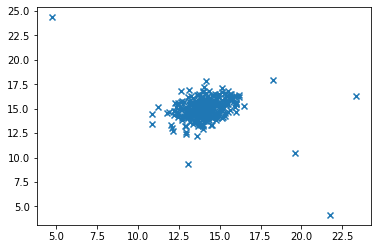

In [ ]:
plt.scatter(X[:,0],X[:,1], marker ='x')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [7]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [8]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

[[2.16228566e-01 2.99282037e-01]
 [2.57494463e-01 1.95359578e-01]
 [2.94127751e-01 2.46338092e-01]
 [2.47180418e-01 2.03564553e-01]
 [2.72534330e-01 2.33718327e-01]
 [2.91795287e-01 1.45439696e-01]
 [1.87118467e-01 2.55993023e-01]
 [1.51227848e-01 2.41471021e-01]
 [9.35546075e-02 1.99494072e-01]
 [1.66546476e-01 3.04236648e-01]
 [2.93392047e-01 9.03776349e-02]
 [2.94479979e-01 2.87660583e-01]
 [2.55598758e-01 2.77971868e-01]
 [2.56000881e-01 2.71735670e-01]
 [2.93266961e-01 1.28872329e-01]
 [2.94441344e-01 2.80896196e-01]
 [2.92881597e-01 2.99766071e-01]
 [2.85181255e-01 3.04637799e-01]
 [2.77259552e-01 2.49513837e-01]
 [9.48677566e-02 1.02571311e-01]
 [2.70256903e-01 2.80135423e-01]
 [2.93412340e-01 3.01206584e-01]
 [2.41097684e-01 1.55197103e-01]
 [2.93034466e-01 2.97369048e-01]
 [1.96113043e-01 2.10396572e-01]
 [1.56540161e-01 1.58934454e-01]
 [2.75913404e-01 2.86693741e-01]
 [2.57544401e-01 2.94825155e-01]
 [2.76683148e-01 2.92116707e-01]
 [2.83497511e-01 2.70323460e-01]
 [1.706929

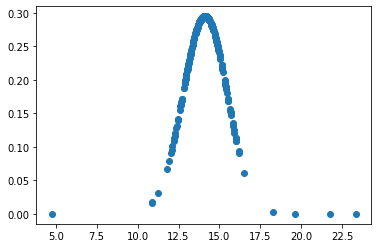

In [10]:
prob=calculProba(X, m, v)
print(prob)
plt.scatter(X[:,0],prob[:,0])

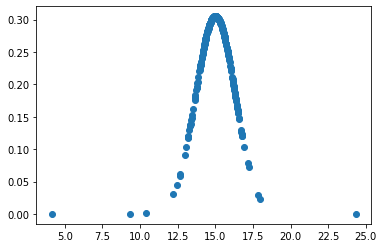

In [ ]:
plt.scatter(X[:,1],prob[:,1])

(307, 1)


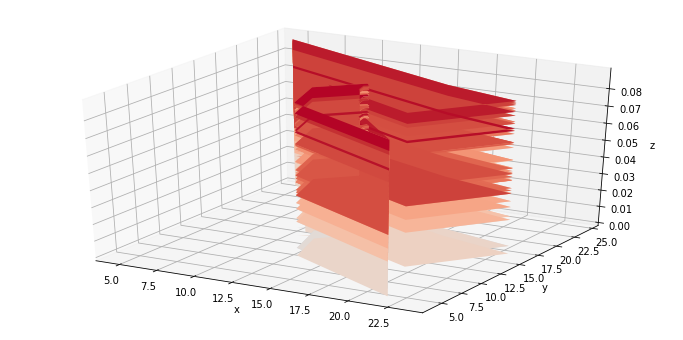

In [26]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

yprob=prob[:,0]*prob[:,1]
yprob=yprob.reshape(yprob.shape[0], 1)
print(yprob.shape)
def plt_plot_bivariate_normal_pdf(x, y, z, name):
  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca(projection='3d')
  ax.plot_surface(x, y, z, 
                  cmap=cm.coolwarm,
                  linewidth=0)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');
  plt.show()


plt_plot_bivariate_normal_pdf(X[:,0], X[:,1], yprob, "plot")

In [15]:
f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]

for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(y, y_pred)))

print(sorted(f1_scores))

[(0.0, 0.0), (0.0001, 0.8), (0.0002, 0.8), (0.00030000000000000003, 0.8), (0.0004, 0.8), (0.0005, 0.8), (0.0006000000000000001, 0.8), (0.0007, 0.8), (0.0008, 0.8), (0.0009000000000000001, 0.8), (0.001, 0.8), (0.0011, 0.8), (0.0012000000000000001, 0.8), (0.0013000000000000002, 0.8), (0.0014, 0.8), (0.0015, 0.8), (0.0016, 0.8), (0.0017000000000000001, 0.8), (0.0018000000000000002, 0.8), (0.0019, 0.8), (0.002, 0.8), (0.0021000000000000003, 0.8), (0.0022, 0.8), (0.0023, 0.8), (0.0024000000000000002, 0.8), (0.0025, 0.8), (0.0026000000000000003, 0.8), (0.0027, 0.75), (0.0028, 0.75), (0.0029000000000000002, 0.75), (0.003, 0.75), (0.0031000000000000003, 0.75), (0.0032, 0.75), (0.0033, 0.75), (0.0034000000000000002, 0.75), (0.0035, 0.75), (0.0036000000000000003, 0.75), (0.0037, 0.75), (0.0038, 0.75), (0.0039000000000000003, 0.75), (0.004, 0.75), (0.0041, 0.75), (0.004200000000000001, 0.75), (0.0043, 0.75), (0.0044, 0.75), (0.0045000000000000005, 0.75), (0.0046, 0.75), (0.0047, 0.705882352941176

En analysant le F1_score, on remarque que pour epsilon = 0.0001, F1_score a une valeur maximal.


Gaussienne multivarié

In [49]:
def calculProbaMulti(X):
    cov = np.cov(X.T)
    mu = np.mean(X, axis=0)
    part1 = (1 / np.sqrt(2 * np.pi * np.linalg.det(cov)))
    part2 = (- 1 / 2) * (((X - mu) @ np.linalg.inv(cov)) * (X - mu)).sum(axis=1)
    return part1 *  np.exp(part2)[:, np.newaxis]

print(calculProbaMulti(X))

[[1.59085891e-01]
 [1.17976919e-01]
 [1.81051049e-01]
 [1.17351272e-01]
 [1.53844343e-01]
 [1.03514705e-01]
 [1.11190487e-01]
 [8.20183961e-02]
 [3.83936960e-02]
 [1.25351182e-01]
 [6.44746079e-02]
 [2.12878567e-01]
 [1.83850612e-01]
 [1.80545937e-01]
 [9.25445071e-02]
 [2.08583503e-01]
 [2.20513401e-01]
 [2.18364160e-01]
 [1.68742243e-01]
 [1.78210461e-02]
 [1.94592997e-01]
 [2.22164581e-01]
 [8.46536603e-02]
 [2.18750910e-01]
 [9.29710308e-02]
 [5.21309650e-02]
 [2.02278693e-01]
 [1.87514318e-01]
 [2.06114717e-01]
 [1.89254918e-01]
 [1.30089490e-01]
 [2.21229470e-01]
 [1.52623811e-01]
 [1.50449469e-01]
 [4.32828052e-02]
 [1.05816538e-01]
 [7.97002362e-02]
 [2.06431755e-01]
 [1.86280200e-01]
 [2.13166590e-01]
 [1.65886771e-01]
 [1.62788155e-01]
 [2.08897869e-01]
 [2.15466173e-01]
 [1.68728610e-01]
 [1.51022213e-01]
 [8.57282830e-02]
 [1.76329275e-01]
 [1.92973996e-01]
 [7.95528974e-02]
 [1.84812493e-01]
 [1.86140266e-01]
 [2.13777350e-01]
 [2.26208737e-01]
 [1.86910162e-01]
 [2.128424

In [50]:
f1_scores = []
yproba = calculProbaMulti(X)
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(y, y_pred)))

print(sorted(f1_scores))

[(0.0, 0.0), (0.0001, 0.8), (0.0002, 0.8), (0.00030000000000000003, 0.8), (0.0004, 0.8), (0.0005, 0.8), (0.0006000000000000001, 0.8), (0.0007, 0.8), (0.0008, 0.8), (0.0009000000000000001, 0.8), (0.001, 0.8), (0.0011, 0.8), (0.0012000000000000001, 0.8), (0.0013000000000000002, 0.8), (0.0014, 0.8), (0.0015, 0.8), (0.0016, 0.8), (0.0017000000000000001, 0.8), (0.0018000000000000002, 0.8), (0.0019, 0.8), (0.002, 0.8), (0.0021000000000000003, 0.8), (0.0022, 0.8), (0.0023, 0.8), (0.0024000000000000002, 0.8), (0.0025, 0.8), (0.0026000000000000003, 0.8), (0.0027, 0.8), (0.0028, 0.8), (0.0029000000000000002, 0.8), (0.003, 0.8), (0.0031000000000000003, 0.8), (0.0032, 0.8), (0.0033, 0.8), (0.0034000000000000002, 0.8), (0.0035, 0.8), (0.0036000000000000003, 0.8), (0.0037, 0.8), (0.0038, 0.8), (0.0039000000000000003, 0.8), (0.004, 0.8), (0.0041, 0.8), (0.004200000000000001, 0.8), (0.0043, 0.8), (0.0044, 0.75), (0.0045000000000000005, 0.75), (0.0046, 0.75), (0.0047, 0.75), (0.0048000000000000004, 0.7

On obtient le meme score avec la meme valeur de epsilon

# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [ ]:
# bonne chance